<a href="https://colab.research.google.com/github/Satyamaadi/python/blob/master/CNN_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras import layers,models

In [18]:
model = models.Sequential()

In [19]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

In [20]:
model.add(layers.MaxPool2D(2,2))

In [21]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [22]:
model.add(layers.MaxPool2D(2,2))

In [24]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 1, 64)          36928     
Total params: 92,672
Trainable params: 92,672
Non-trainable params: 0
__________________________________________________

In [27]:
model.add(layers.Flatten())

In [28]:
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 1, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 64)               

In [30]:
from keras.datasets import mnist

In [32]:
from keras.utils import to_categorical

In [35]:
(train_data,train_label),(test_data,test_label) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [36]:
train_data = train_data.reshape((60000,28,28,1))

In [37]:
train_data = train_data.astype('float32')/255

In [39]:
test_data = test_data.reshape((10000,28,28,1))

In [40]:
test_data = test_data.astype('float32')/255

In [42]:
test_label = to_categorical(test_label)

In [43]:
train_label = to_categorical(train_label)

In [44]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
model.fit(train_data,train_label,batch_size=128,epochs=8,shuffle=True)

Epoch 1/8
469/469 [==============================] - 48s 100ms/step - loss: 0.5874 - accuracy: 0.8036
Epoch 2/8
469/469 [==============================] - 46s 99ms/step - loss: 0.0659 - accuracy: 0.9790
Epoch 3/8
469/469 [==============================] - 46s 97ms/step - loss: 0.0405 - accuracy: 0.9877
Epoch 4/8
469/469 [==============================] - 45s 96ms/step - loss: 0.0275 - accuracy: 0.9910
Epoch 5/8
469/469 [==============================] - 46s 98ms/step - loss: 0.0222 - accuracy: 0.9931
Epoch 6/8
469/469 [==============================] - 46s 98ms/step - loss: 0.0187 - accuracy: 0.9943
Epoch 7/8
469/469 [==============================] - 46s 98ms/step - loss: 0.0145 - accuracy: 0.9954
Epoch 8/8
469/469 [==============================] - 46s 98ms/step - loss: 0.0115 - accuracy: 0.9964


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


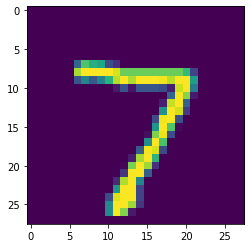

In [58]:
model.predict_classes(test_data[0:1])
import matplotlib.pyplot as plt
plt.imshow(test_data[0:1].reshape((28,28)))


In [60]:
print(model.predict_classes(test_data[0:1]))

[7]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
